In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from datetime import datetime

In [4]:
stat_df = pd.read_csv('data/statipy_results.csv')

###### drops unnamed axis  |  changes Rdate to datetime index  |  rdate index + artsongcnt + songfreq

In [5]:
statidate_i = stat_df.drop('Unnamed: 0', axis=1)

In [6]:
statidate_i['Rdate']= pd.DatetimeIndex(statidate_i['Rdate'], freq='infer')

In [7]:
statidate_i['artfreq'] = statidate_i.groupby('Artist')['Track'].transform('count')

In [8]:
statidate_i['songfreq'] = statidate_i.groupby('Track')['Track'].transform('count')

*********************************************

###### rdate index + artsongcnt + songfreq + datesongcnt (copy statidate_i)

In [9]:
stat_allfreq = statidate_i.copy()

In [10]:
stat_allfreq['fdatefreq'] = stat_allfreq.groupby('Rdate')['Track'].transform('count')

In [11]:
stat_allfreq.head()

,Track,Explicit,Tpopularity,Artist,Album,Rdate,artfreq,songfreq,fdatefreq
0,Paradise,False,49,Voyage,Paradise,2018-02-14,1,1,1
1,Tech Noir,False,56,Gunship,GUNSHIP,2015-07-24,1,1,1
2,Yes (Symmetry Remix),False,38,Chromatics,Yes (Love Theme From Lost River),2015-02-03,1,1,2
3,Night,False,39,John Carpenter,Lost Themes,2015-02-03,1,1,2
4,Depth Charge,False,5,Flume,Skin Companion EP II,2017-02-17,1,1,1


************************************

###### YEAR + songfreq + artsongcnt + yrsongcnt (copy statidate_i)

In [12]:
statipy_yr = statidate_i.copy()

In [13]:
statipy_yr['Rdate'] = pd.DatetimeIndex(statipy_yr['Rdate']).year

In [14]:
statipy_yr['yfreq'] = statipy_yr.groupby('Rdate')['Track'].transform('count')

In [15]:
statipy_yr.head()

,Track,Explicit,Tpopularity,Artist,Album,Rdate,artfreq,songfreq,yfreq
0,Paradise,False,49,Voyage,Paradise,2018,1,1,118
1,Tech Noir,False,56,Gunship,GUNSHIP,2015,1,1,61
2,Yes (Symmetry Remix),False,38,Chromatics,Yes (Love Theme From Lost River),2015,1,1,61
3,Night,False,39,John Carpenter,Lost Themes,2015,1,1,61
4,Depth Charge,False,5,Flume,Skin Companion EP II,2017,1,1,142


******************************************
******************************************

****************************************

# FREQ / COUNT (CNT)
## ( number of times song is featured in playlist per track, artist, release date)
*****************************

### SONG FREQ  - Track repeats divided into [norpt, rpt2, rpt3]

In [14]:
norpt = statipy_yr[statipy_yr['songfreq']<=1]

In [15]:
rpt2 = statipy_yr[statipy_yr['songfreq']>=2]

In [16]:
rpt4 = statipy_yr[statipy_yr['songfreq']>=4]

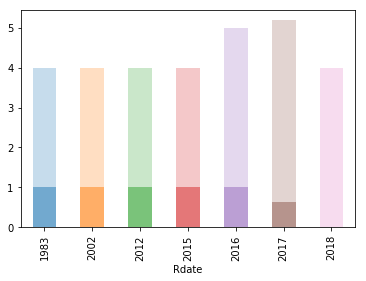

In [17]:
rpt4.groupby(['Rdate'])['Explicit'].mean().plot.bar(stacked=True, alpha=0.50)
rpt4.groupby(['Rdate'])['songfreq'].mean().plot.bar(stacked=True, alpha=0.25)

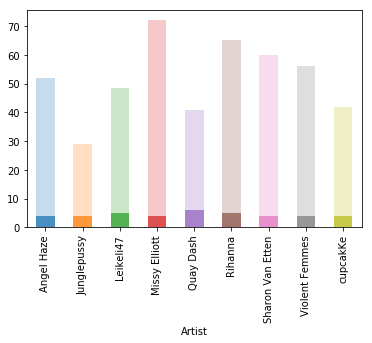

In [18]:
rpt4.groupby(['Artist'])['Tpopularity'].mean().plot.bar(stacked=True, alpha=0.25)
rpt4.groupby(['Artist'])['songfreq'].count().plot.bar(stacked=True, alpha=0.75)

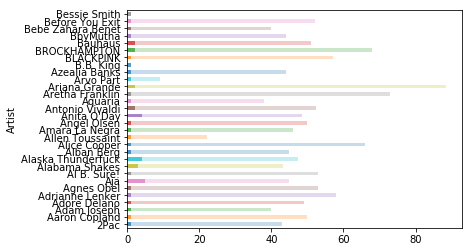

In [19]:
norpt.groupby(['Artist'])['Tpopularity'].mean().head(30).plot.barh(stacked=True, alpha=0.25)
norpt.groupby(['Artist'])['artfreq'].count().head(30).plot.barh(stacked=True, alpha=0.75)

In [ ]:
# artists with tracks repeated >4 &&& tracks non repeated XX 
###### artfreq x \ artfreq y is same = total artists tracks
### song freq_x is songs non repeated number
### song freq_y is songs reapeated numner

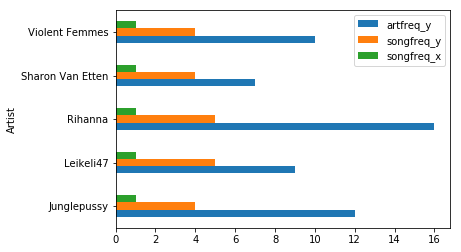

In [21]:
mergerpts = pd.merge(norpt, rpt4, on=['Artist'], how='inner')
mergerpts.groupby(['Artist'])['artfreq_y', 'songfreq_y', 'songfreq_x'].mean().plot.barh()

*****************************

*****************************
# POPULARITY
*****************************

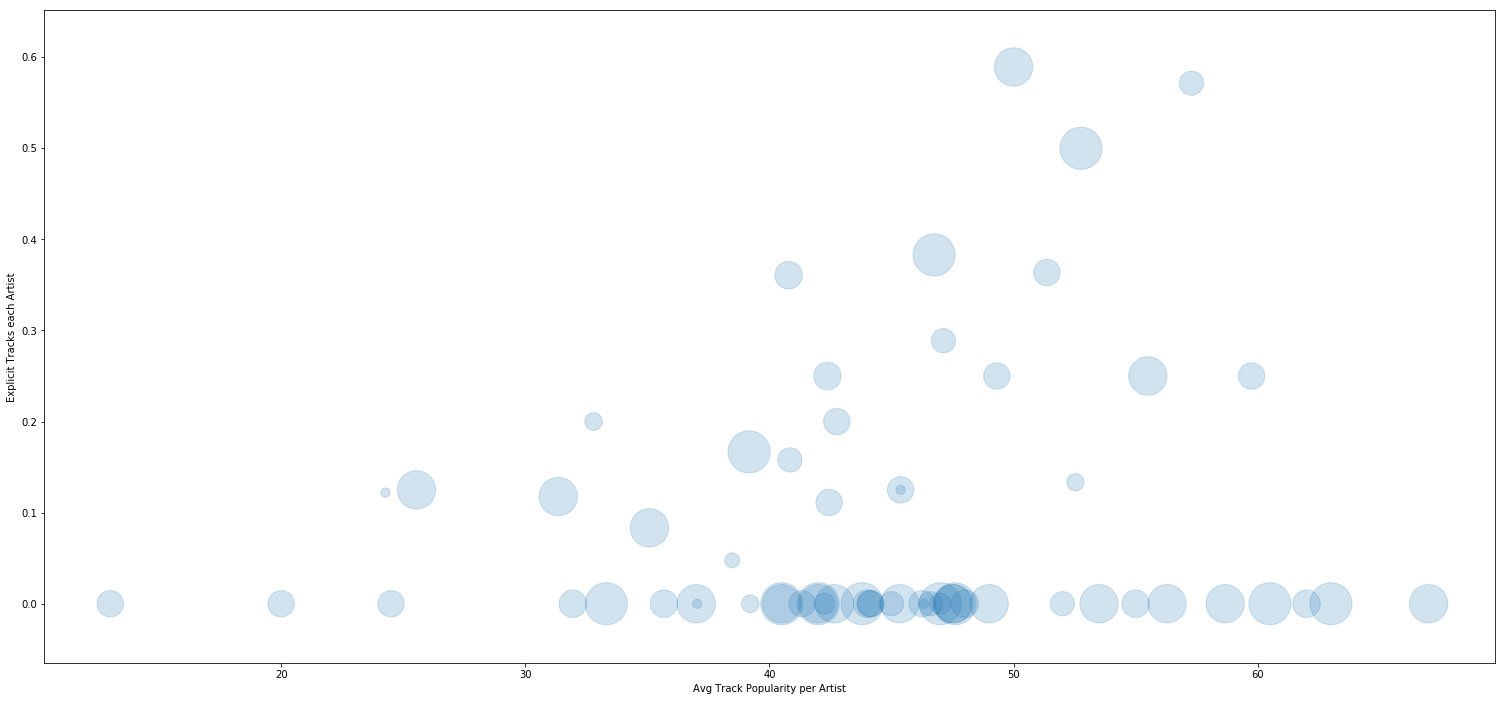

In [212]:
##### ALL TRACKS POP x EXPLICIT / YEAR dates
##### RECALL STATIPY_DF ( + track columns)¶
#scatter - popularity / explicit count *** s=statipy_df['artfreq']*5*

x = statipy_yr.groupby(['Rdate'])[['Tpopularity']].mean()
y = statipy_yr.groupby(['Rdate'])['Explicit'].mean()

fig, ax = plt.subplots(figsize=(26, 12))
ax.scatter(x=x, y=y, s=statipy_yr['yfreq']*12.5, alpha=0.20);

ax.set_xlabel('Avg Track Popularity per Artist')
ax.set_ylabel('Explicit Tracks each Artist')

plt.show()

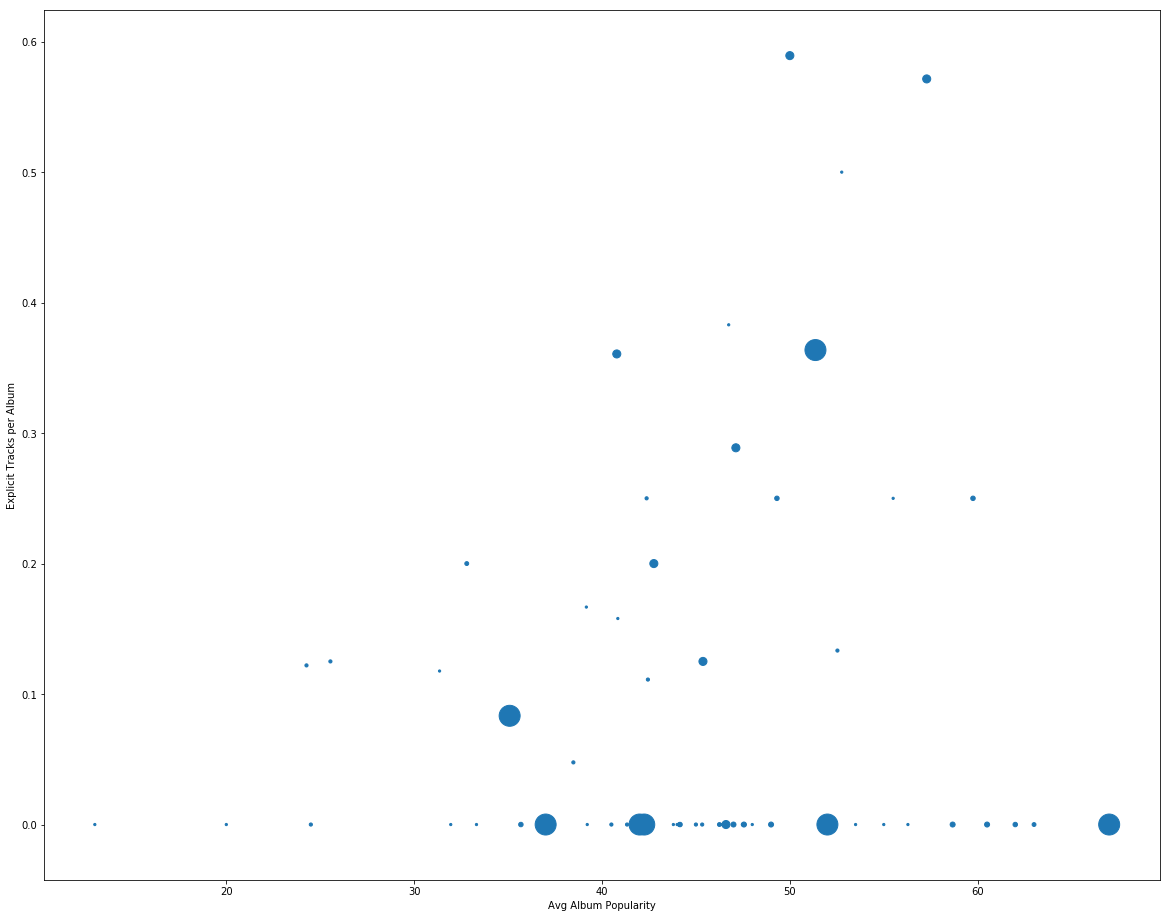

In [217]:
#### Rdate by track popularity over explicit content. with artist number of tracks to size
x = statipy_yr.groupby(['Rdate'])['Tpopularity'].mean()
y = statipy_yr.groupby(['Rdate'])[['Explicit']].mean()

fig, ax = plt.subplots(figsize=(20, 16))
ax.scatter(x=x, y=y, s=statipy_yr['artfreq']*5);
ax.set_xlabel('Avg Album Popularity')
ax.set_ylabel('Explicit Tracks per Album')

plt.show()

In [32]:
popular_tracks= statipy_yr[statipy_yr['Tpopularity']>=43.71]

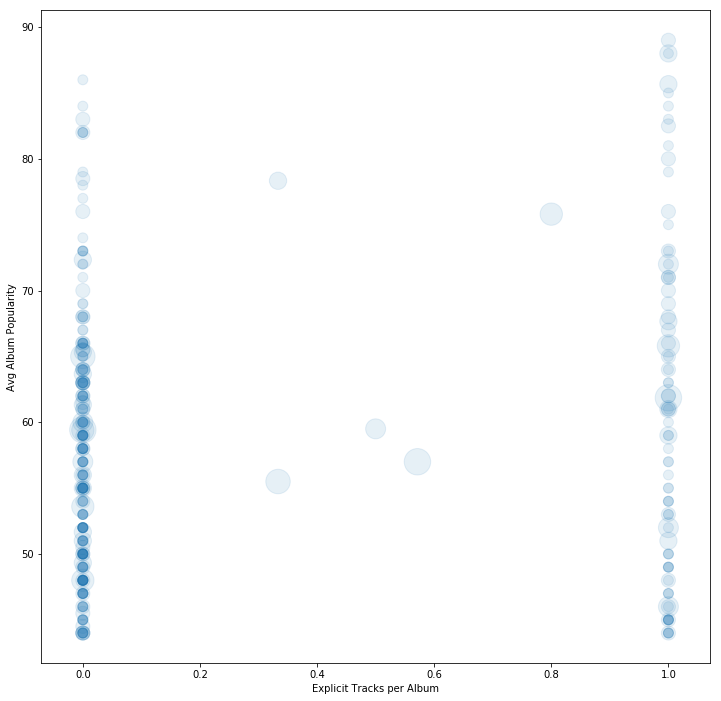

The slowest run took 4.46 times longer than the fastest. This could mean that an intermediate result is being cached.
3.54 µs ± 2.61 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [34]:
#### Yr plots albums by date by track popularity over explicit content, album # tracks to size

x = popular_tracks.groupby(['Album'])['Tpopularity'].mean()
y = popular_tracks.groupby(['Album'])['Explicit'].mean()
s = popular_tracks.groupby(['Album'])['Track'].count()

fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(y, x, s*100, alpha=0.11);
ax.set_ylabel('Avg Album Popularity')
ax.set_xlabel('Explicit Tracks per Album')
%timeit plt.show()

******************************************

# 1.  DATE
**********************************

###### Year full statistics

In [273]:
year_data = statipy_yr.groupby(['Rdate']).mean()
#year_data.head()

## GROUP A
###### Year least tracks per year

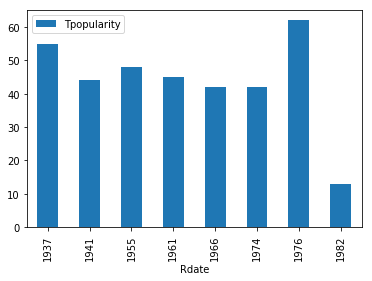

In [294]:
minfreqdates = statipy_yr[statipy_yr['yfreq']==1]
minfreqdates.groupby(['Rdate'])[['Tpopularity']].mean().plot.bar()

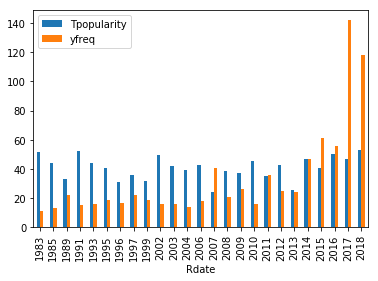

In [17]:
maxfreqdates = statipy_yr[statipy_yr['yfreq']>=11]
date_max = maxfreqdates.groupby(['Rdate'])[['Tpopularity', 'yfreq']].mean()
date_max.plot.bar(stacked=False)

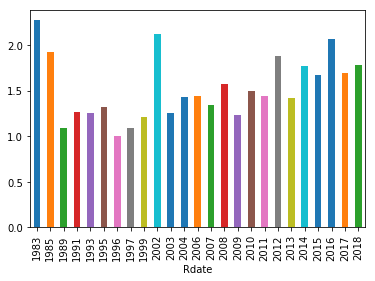

In [27]:
date_repeats = maxfreqdates.groupby('Rdate')['songfreq'].mean()
date_repeats.plot.bar()

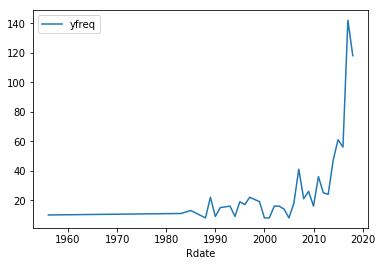

In [292]:
freqdates = statipy_yr[statipy_yr['yfreq']>=8]
date_i = freqdates.groupby(['Rdate'])[['yfreq']].mean()
date_i.plot.line(stacked=True)

In [ ]:
## plots artists with more than 5 tracks album stats over dates

#artmaxcnt1 = statipy_yr[statipy_yr['Tpopularity']>=43.93]
maxart_highpop = artmaxcnt1[artmaxcnt1['Tpopularity']>=43.93]

#- plots artist with most frequent songs with no repeats high popularity over dates

In [ ]:
mxart_hpop1nr = maxart_highpop[maxart_highpop['songfreq']<=1.0]

mxart_hpop1nr.groupby(['Rdate'])['Tpopularity'].mean().plot()

In [ ]:
mxart_hpop2r = maxart_highpop[maxart_highpop['songfreq']>=2]

mxart_hpop2r.groupby(['Rdate'])['Tpopularity'].mean().plot()

## GROUP B | Chronological 
#### (oldest dates)

In [20]:
older_tracks = statipy_yr.groupby(['Rdate', 'Artist'])[['Tpopularity', 'artfreq', 'yfreq']].mean().head(15)

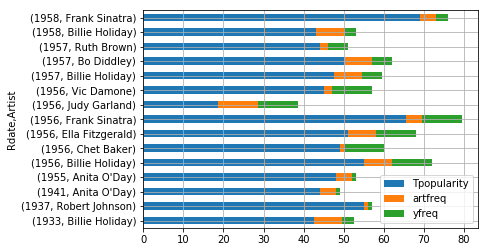

In [21]:
older_tracks.plot(kind='barh', stacked=True, grid=True)

#### (newest dates)

In [301]:
newest_tracks = statipy_yr.groupby(['Rdate', 'Artist'])[['Tpopularity', 'artfreq', 'yfreq']].mean().tail(15)

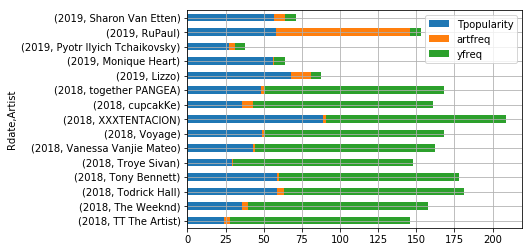

In [302]:
newest_tracks.plot(kind='barh',stacked=True, grid=True)

*********************************

# 2. ARTISTS
************************************


In [304]:
art_statsy = statipy_yr.groupby(['Artist', 'Rdate']).mean()
#art_statsy

In [ ]:
#### artists full statistics per clean data 
top - Tpopularity, Explicit, Songfreq

****************************************

In [308]:
artistdf1 = statipy_yr.groupby(['Artist', 'Rdate'])[['Tpopularity', 'artfreq', 'songfreq', 'Explicit']].mean()
artistdf1.head()

,,Tpopularity,artfreq,songfreq,Explicit
Artist,Rdate,,,,
!!!,2017,38.0,2.0,2.0,0.0
2Pac,2014,43.0,1.0,1.0,1.0
Aaron Copland,1960,50.0,1.0,1.0,0.0
Adam Joseph,2017,40.0,1.0,1.0,0.0
Adore Delano,2014,49.0,1.0,1.0,1.0


In [312]:
artmaxcnt1 = artistdf1[artistdf1['artfreq']>=5]
maxartnonr = artmaxcnt1[artmaxcnt1['songfreq']<=1.50]
maxartrepeats = artmaxcnt1[artmaxcnt1['songfreq']>=1.50]

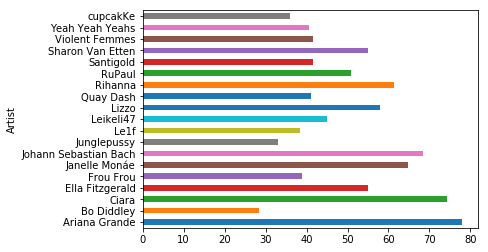

In [313]:
maxartrepeats.groupby('Artist')['Tpopularity'].mean().plot.barh(stacked=True)

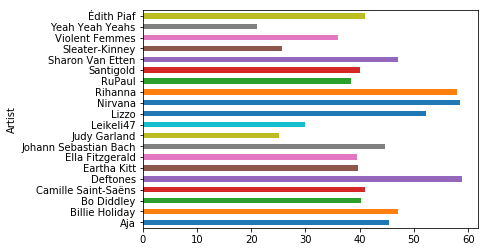

In [314]:
maxartnonr.groupby(['Artist'])['Tpopularity'].mean().plot.barh(stacked=True)

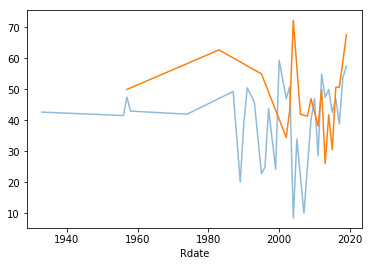

In [315]:
maxartnonr.groupby(['Rdate'])['Tpopularity'].mean().plot.line(stacked=True, alpha=0.50)
maxartrepeats.groupby(['Rdate'])['Tpopularity'].mean().plot.line(stacked=True)

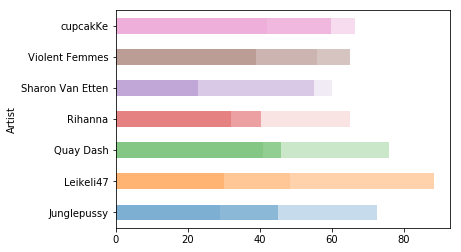

In [26]:
### song frequency X artist tracks (artfreq)
#### artist with most non repeat tracks || artf_nor
artf_nor = norpt[norpt['artfreq']>=5]
artf_rpt2 = rpt2[rpt2['artfreq']>=5]
artf_rpt4 = rpt4[rpt4['artfreq']>=5]

###### plot : artist_mostsolo / artsongcnt XX popularity / dates (year)
artf_nor.groupby(['Artist'])['Tpopularity'].mean().plot.barh(stacked=True, alpha=0.35)
artf_rpt2.groupby(['Artist'])['Tpopularity'].mean().plot.barh(stacked=True, alpha=0.25)
artf_rpt4.groupby(['Artist'])['Tpopularity'].mean().plot.barh(stacked=True, alpha=0.13)

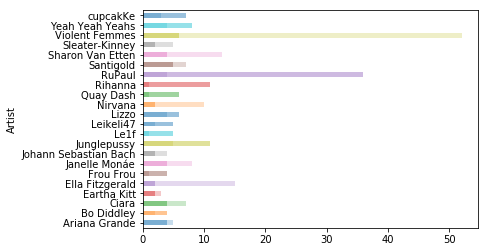

In [164]:
artf_nor.groupby(['Artist'])['artfreq'].count().plot.barh(stacked=True, alpha=0.25)
artf_rpt2.groupby(['Artist'])['artfreq'].count().plot.barh(stacked=True, alpha=0.45)

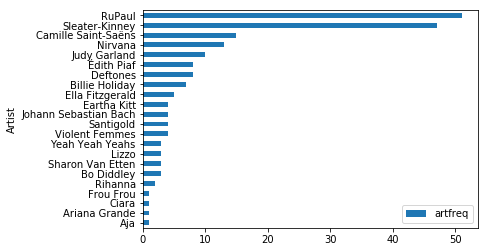

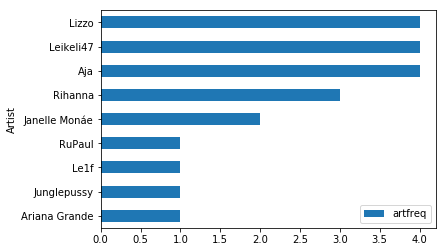

In [27]:
## GROUP C
### artists most solo / explicit tracks
#### pg13artf_nor || ex_artf_nor
ex_artf_nor = artf_nor[artf_nor['Explicit']==1.0]
pg13artf_nor = artf_nor[artf_nor['Explicit']==0.0]

###### plot :: Tpopularity XX artsongcnt XX Explicit ?? (level of 0 - 2)

pg13artf_nor.groupby('Artist')[['artfreq']].count().sort_values('artfreq').plot.barh()
ex_artf_nor.groupby('Artist')[['artfreq']].count().sort_values('artfreq').plot.barh()

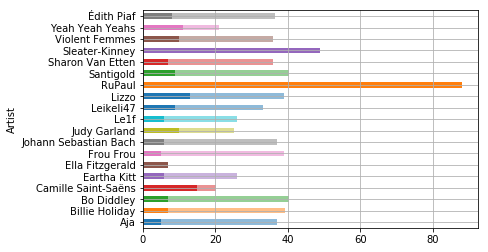

In [28]:
### SOLO_DF >43 POP only  |  hpop_artfnor
###### plot per release date - artists track count // avg track popularity

hpop_artfnor = artf_nor[artf_nor['Tpopularity']<=43.17]
hpop_artfnor.groupby('Artist')['artfreq'].mean().plot.barh()
hpop_artfnor.groupby('Artist')['Tpopularity'].mean().plot.barh(grid=True, alpha=0.50)

******************************************************


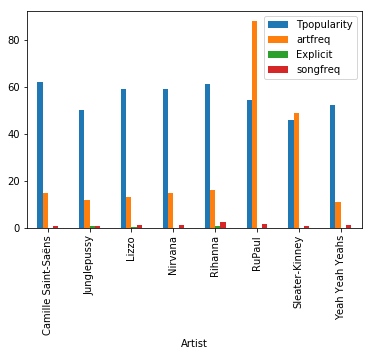

In [227]:
## GROUP 
### MOST POP ARTIST BY ARTFREQ
#### bar plot - most pop artists with most freq tracks XX explicit & song freq

# popular_tracks= statipy_yr[statipy_yr['Tpopularity']>=43.71]
## popular_tracks['artfreq'].mean() = 10.287937743190662

# plot
hpopartf = popular_tracks[popular_tracks['artfreq']>=10.67]
hpopartf.groupby('Artist')[['Tpopularity', 'artfreq', 'Explicit', 'songfreq']].mean().plot.bar()

*****************************
# ARTIST: EXPLICIT CONTENT
*****************************

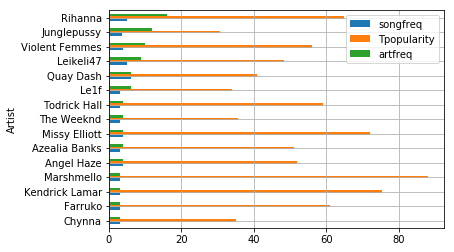

In [29]:

## || >3 SONG REPEATS (3x liked)
#### EXPLICIT x 
explicit_tracks = statipy_yr[statipy_yr['Explicit']==True]
ex_artf = explicit_tracks[explicit_tracks['songfreq']>=3]
### plots artists with most repeats && explicit tracks
exfqartists = ex_artf.groupby('Artist')[['songfreq','Tpopularity','artfreq']].mean()
exfqartists.sort_values('artfreq').plot.barh(grid=True)


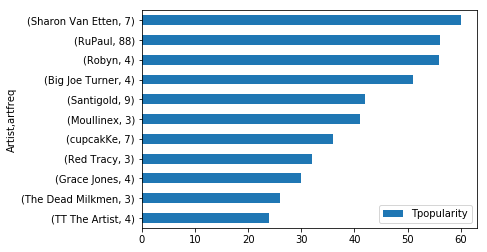

In [33]:
###### ARTEX_SET
artrpt3 = statipy_yr[statipy_yr['songfreq']>=3]
artex_df = artrpt3[artrpt3['Explicit']<=0.0]
artex_set = artex_df.groupby(['Artist', 'artfreq'])[['Tpopularity']].mean()
artex_set.sort_values('Tpopularity').plot.barh()

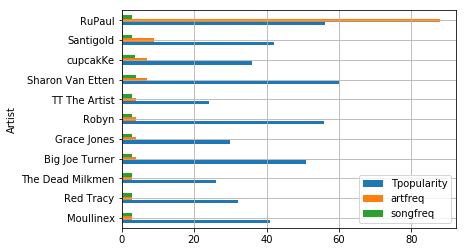

In [30]:

#### PG13 x 
pg_tracks = statipy_yr[statipy_yr['Explicit']==False]
freqpg_tracks = pg_tracks[pg_tracks['songfreq']>=3]
## plots artists with most repeats && pg13 tracks
artfreqpg = freqpg_tracks.groupby('Artist')[['Tpopularity', 'artfreq', 'Explicit', 'songfreq']].mean()
artfreqpg.sort_values('artfreq').plot.barh(grid=True)


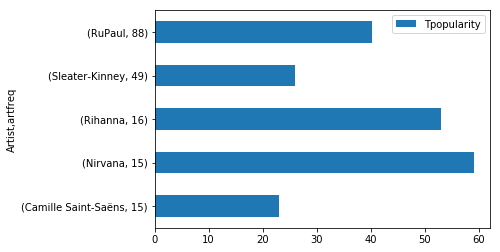

In [32]:

##### ARTPG_DF
### statipy_yr['artfreq'].mean() = 13.74268415741675
artmaxcnt = statipy_yr[statipy_yr['artfreq']>=13.74]
artpgmaxcnt = artmaxcnt[artmaxcnt['Explicit']==0.0]
artpg_df = artpgmaxcnt.groupby(['Artist', 'artfreq'])[['Tpopularity']]
artpg_df.mean().sort_values('artfreq').plot.barh()


*****************************************************


In [352]:
mergehigh = pd.merge(mxart_hpop1nr, mxart_hpop2r, on=['Artist'], how='inner')
mergehigh.groupby('Artist')[['Tpopularity_x']].mean()

,Tpopularity_x
Artist,
Ella Fitzgerald,51.0
Johann Sebastian Bach,52.5
Lizzo,57.5
Rihanna,58.0
RuPaul,58.0
Sharon Van Etten,57.0


In [353]:
nonrepeatunion = mxart_hpop1nr[(mxart_hpop1nr['artfreq'] > 2) & (mxart_hpop1nr['Tpopularity'] > 56)]

In [354]:
nonrepeatunion

Tpopularity  artfreq  songfreq  Explicit
Artist                Rdate                                          
Camille Saint-Saëns   2015          62.0     15.0       1.0       0.0
Deftones              1997          64.0      8.0       1.0       0.0
                      2000          59.4      8.0       1.0       0.0
Johann Sebastian Bach 2013          58.0      6.0       1.0       0.0
Lizzo                 2018          61.0     13.0       1.0       0.0
Nirvana               1993          57.0     15.0       1.0       0.0
Rihanna               2010          61.0     16.0       1.0       1.0
RuPaul                2019          58.0     88.0       1.0       0.0
Sharon Van Etten      2019          57.0      7.0       1.0       0.0

In [355]:
nonrepeatunion[['artfreq']].mean()

artfreq    19.555556
dtype: float64

In [356]:
repeatunion = mxart_hpop2r[(mxart_hpop2r['Tpopularity'] > 50) & (mxart_hpop2r['artfreq'] < 19.55)]

In [357]:
repeatunion

Tpopularity  artfreq  songfreq  Explicit
Artist                Rdate                                          
Ariana Grande         2018     77.833333      6.0  1.666667  0.833333
Ciara                 2004     72.333333      5.0  1.666667  0.000000
                      2018     76.000000      5.0  2.000000  0.000000
Ella Fitzgerald       1995     55.000000      7.0  2.000000  0.000000
Janelle Monáe         2018     64.833333      6.0  1.666667  1.000000
Johann Sebastian Bach 1983     68.500000      6.0  2.000000  0.000000
Lizzo                 2017     63.000000     13.0  2.000000  0.000000
                      2019     67.666667     13.0  1.666667  1.000000
Rihanna               2011     59.500000     16.0  2.000000  0.500000
                      2016     63.222222     16.0  3.444444  1.000000
Sharon Van Etten      2017     55.000000      7.0  3.400000  0.000000
Violent Femmes        1983     57.000000     10.0  2.714286  0.571429

2.39 ms ± 76.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


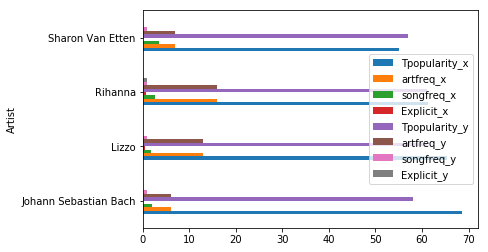

In [375]:
mergeunion = pd.merge(repeatunion, nonrepeatunion, on=['Artist'], how='inner')
mergeunion.groupby(['Artist']).mean().plot.barh()